# LioJotstar Merger: Data Analysis with Python for Strategic Optimization

## 5. Exploring Content Diversity Across Platforms
This notebook aims to understand the content diversity of LioCinema and Jotstar. It visualizes and compares the platforms based on content type, language, and genre breakdown, as well as the distributions across different content categories and genres using grouped bar charts, pie charts, tornado charts, and heatmaps.

### Importing Required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Required DataFrames from Saved Parquet Files

In [6]:
try:
    jotstar_contents_df = pd.read_parquet('Parquet Data Files/02. Data Wrangling/Jotstar_db/contents.parquet')
    print("Jotstar - Contents table loaded successfully.")
    liocinema_contents_df = pd.read_parquet('Parquet Data Files/02. Data Wrangling/LioCinema_db/contents.parquet')
    print("LioCinema - Contents table loaded successfully.")
    print("\nData Loading Complete.")
    
except FileNotFoundError as e:
       print("Error: One or more parquet files not found. Please check the file paths.")
       print(f"Details: {e}")
except Exception as e:
       print("An error occurred during data import.")
       print(f"Details: {e}")

Jotstar - Contents table loaded successfully.
LioCinema - Contents table loaded successfully.

Data Loading Complete.


### Data Analysis & Visualization

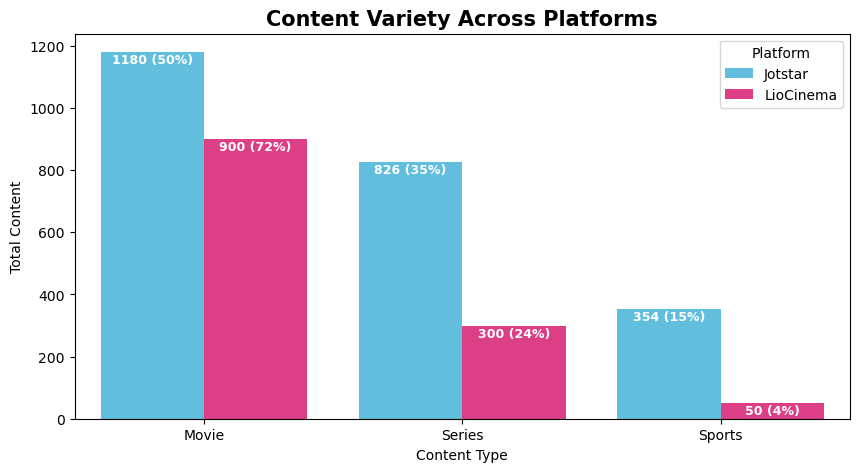

In [8]:
def get_content_count(df):
    result = df.groupby('Content Type')['Content ID'].count()
    result = result.to_frame().rename(columns = {'Content ID':'Total Content'}).reset_index()
    result['Total Content (%)'] = (result['Total Content'] / (result['Total Content'].sum())) * 100
    return result
    
jotstar_temp_df = get_content_count(jotstar_contents_df)
jotstar_temp_df['Platform'] = "Jotstar"
liocinema_temp_df = get_content_count(liocinema_contents_df)
liocinema_temp_df['Platform'] = "LioCinema"
merged_df = pd.concat([jotstar_temp_df, liocinema_temp_df])

plt.figure(figsize = (10, 5))
plt.title("Content Variety Across Platforms", fontsize = 15, fontweight = "bold")

bp = sns.barplot(merged_df, x = 'Content Type', y = 'Total Content', hue = 'Platform', palette = ["#4CC9F0", "#F72585"])

for bar, content, pct in zip(bp.patches, merged_df['Total Content'], merged_df['Total Content (%)']):
    x = bar.get_x() + bar.get_width() / 2  
    y = bar.get_height()
    label = f"{content:.0f} ({pct:.0f}%)"  
    plt.text(x, y - 5.4, label, ha = "center", va = "top", fontsize = 9, color = "white", fontweight = "bold")

([<matplotlib.patches.Wedge at 0x26c3e524650>,
 [Text(0.5323500342323513, 0.9626024314600574, 'Hindi'),
  Text(-1.0122550037260793, 0.4305111002419277, 'Telugu'),
  Text(-0.7961653095767874, -0.7590262181417046, 'Tamil'),
  Text(0.05526865619001661, -1.0986106569858813, 'Malayalam'),
  Text(0.6665260842940979, -0.8750674139491067, 'Kannada'),
  Text(0.9893457466957968, -0.4808274050997265, 'Marathi'),
  Text(1.089123182396141, -0.15430714036395973, 'English')],
 [Text(0.41136139008863504, 0.7438291515827715, '424 (33.9%)'),
  Text(-0.7821970483337886, 0.3326676683687622, '242 (19.4%)'),
  Text(-0.6152186483093357, -0.5865202594731354, '221 (17.7%)'),
  Text(0.04270759796501283, -0.8489264167618173, '121 (9.7%)'),
  Text(0.5150428833181665, -0.6761884562334005, '118 (9.4%)'),
  Text(0.7644944406285702, -0.3715484493952432, '68 (5.4%)'),
  Text(0.8415951863970178, -0.11923733573578706, '56 (4.5%)')])

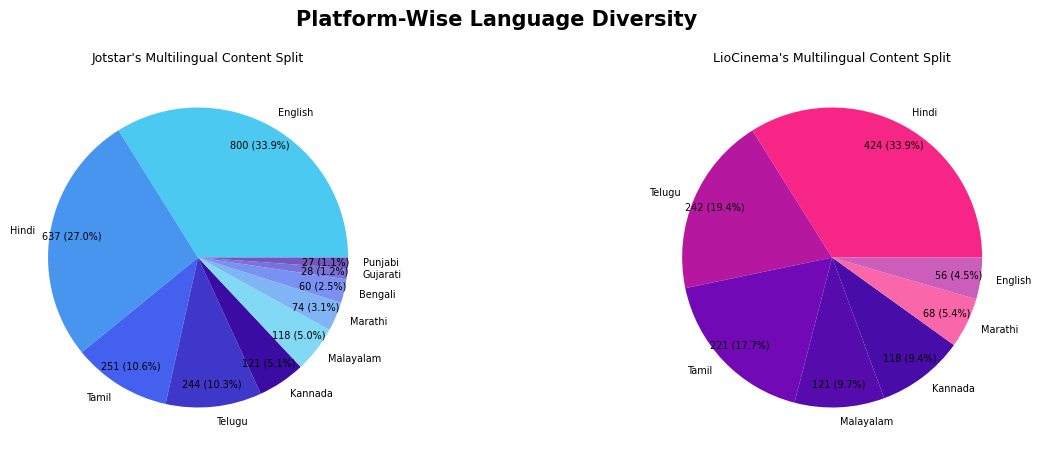

In [9]:
def get_content_count(df):
    result = df.groupby('Language')['Content ID'].count()
    result = result.to_frame().rename(columns = {'Content ID':'Total Content'}).reset_index()
    result = result.sort_values('Total Content', ascending = False)
    return result
    
jotstar_temp_df = get_content_count(jotstar_contents_df)
liocinema_temp_df = get_content_count(liocinema_contents_df)

def autopct_format(pct, all_vals):
    absolute = int(round(pct / 100. * sum(all_vals)))
    return f"{absolute} ({pct:.1f}%)"  

plt.figure(figsize = (15, 5))
plt.subplots_adjust(top = 0.86)
plt.suptitle("Platform-Wise Language Diversity", fontsize = 15, fontweight = "bold")

Jotstar = ["#4CC9F0", "#4895EF", "#4361EE", "#3F37C9", "#3A0CA3", "#82D9F5", "#7FB5F4", "#7B90F3", "#7973D9", "#7555BF"]
LioCinema = ["#F72585", "#B5179E", "#7209B7", "#560BAD", "#480CA8", "#F966AA", "#CB5DBB", "#9C53CD", "#8954C6", "#7F55C2"]

ax1 = plt.subplot(1, 2, 1)
ax1.set_aspect("equal")
plt.title("Jotstar's Multilingual Content Split", fontsize = 9)
plt.pie(jotstar_temp_df['Total Content'], labels = jotstar_temp_df['Language'], 
        autopct = lambda pct: autopct_format(pct, jotstar_temp_df['Total Content']), 
        colors = Jotstar, textprops = {"fontsize": 7}, pctdistance = 0.85)

ax2 = plt.subplot(1, 2, 2)
ax2.set_aspect("equal")
plt.title("LioCinema's Multilingual Content Split", fontsize = 9)
plt.pie(liocinema_temp_df['Total Content'], labels = liocinema_temp_df['Language'], 
        autopct = lambda pct: autopct_format(pct, liocinema_temp_df['Total Content']), 
        colors = LioCinema, textprops = {"fontsize": 7}, pctdistance = 0.85)

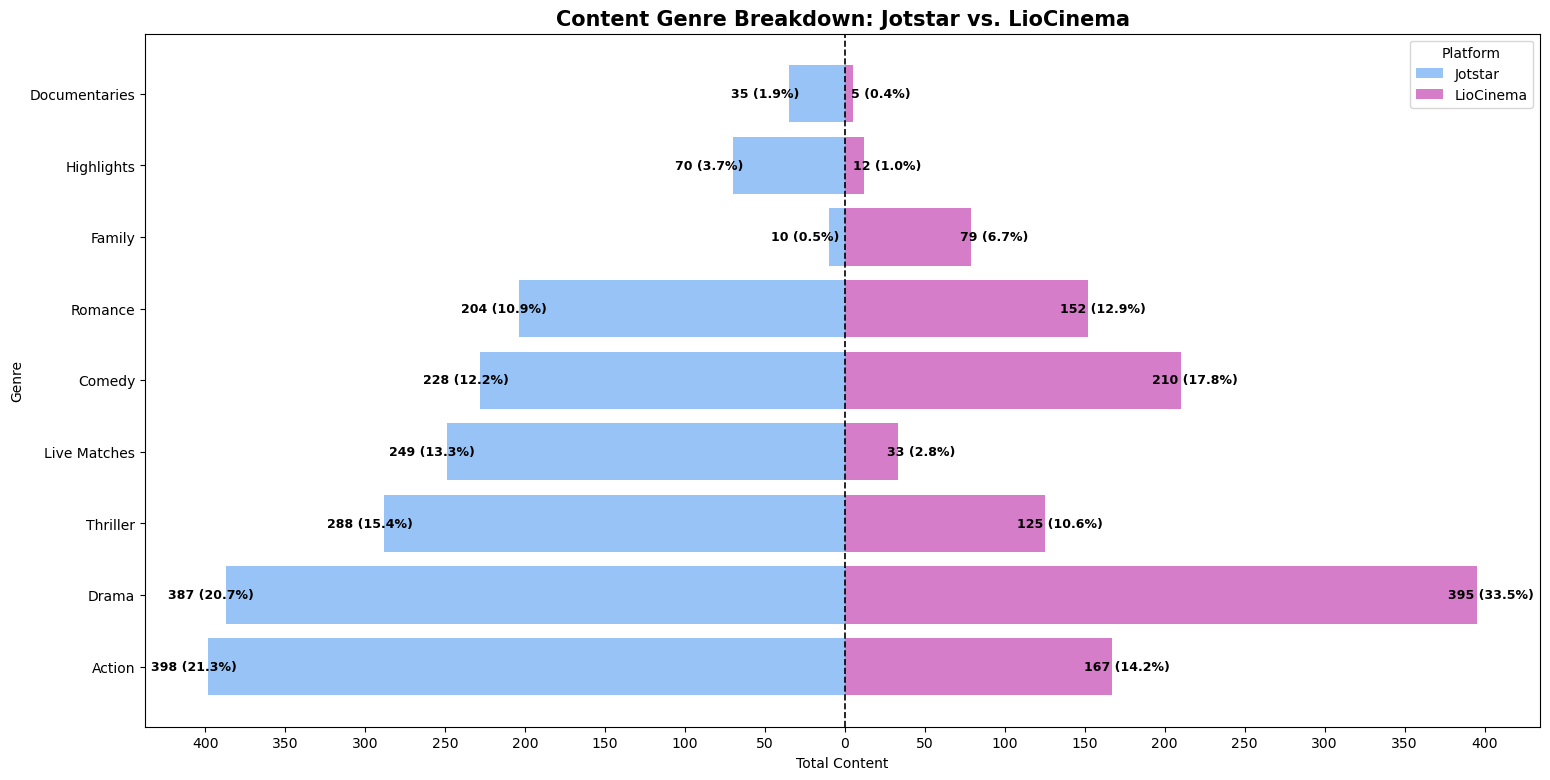

In [10]:
def get_content_count(df):
    result = df.groupby('Genre')['Content ID'].count()
    result = result.to_frame().rename(columns = {'Content ID':'Total Content'}).reset_index()
    return result

jotstar_temp_df = get_content_count(jotstar_contents_df)
liocinema_temp_df = get_content_count(liocinema_contents_df)

merged_df = pd.merge(jotstar_temp_df, liocinema_temp_df, on = 'Genre', suffixes = ('_jr', '_lr'))
merged_df['SortKey'] = merged_df[['Total Content_jr', 'Total Content_lr']].max(axis = 1)
merged_df = merged_df.sort_values('SortKey', ascending = False)

jotstar_temp_df = merged_df[['Genre', 'Total Content_jr']].rename(columns = {'Total Content_jr':'Total Content'})
liocinema_temp_df = merged_df[['Genre', 'Total Content_lr']].rename(columns = {'Total Content_lr':'Total Content'})

jotstar_temp_df['Total Content'] *= -1

plt.subplots(figsize = (18, 9))
plt.title("Content Genre Breakdown: Jotstar vs. LioCinema", fontsize = 15, fontweight = "bold")

bars_js = plt.barh(jotstar_temp_df['Genre'], jotstar_temp_df['Total Content'], color = "#7FB5F4", label = "Jotstar", alpha = 0.8)
bars_lc = plt.barh(liocinema_temp_df['Genre'], liocinema_temp_df['Total Content'], color = "#CB5DBB", label = "LioCinema", alpha = 0.8)

for bar in bars_js:
    value = abs(bar.get_width())
    pct = (value / abs(jotstar_temp_df['Total Content'].sum())) * 100
    plt.text(bar.get_width() - 36, bar.get_y() + bar.get_height() / 2,
             f"{value:.0f} ({pct:.1f}%)", va = "center", ha = "left",
             color = "black", fontsize = 9, fontweight = "bold")

for bar in bars_lc:
    value = bar.get_width()
    pct = (value / liocinema_temp_df['Total Content'].sum()) * 100
    plt.text(bar.get_width() + 36, bar.get_y() + bar.get_height() / 2,
             f"{value:.0f} ({pct:.1f}%)", va = "center", ha = "right",
             color = "black", fontsize = 9, fontweight = "bold")

plt.xlabel("Total Content")
plt.ylabel("Genre")
plt.axvline(0, color = "black", linewidth = 1.2, linestyle = "dashed")

plt.xticks(
    ticks=[-400, -350, -300, -250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300, 350, 400],
    labels=["400", "350", "300", "250", "200", "150", "100", "50", "0", "50", "100", "150", "200", "250", "300", "350", "400"])
plt.legend(title = "Platform", loc = "upper right")

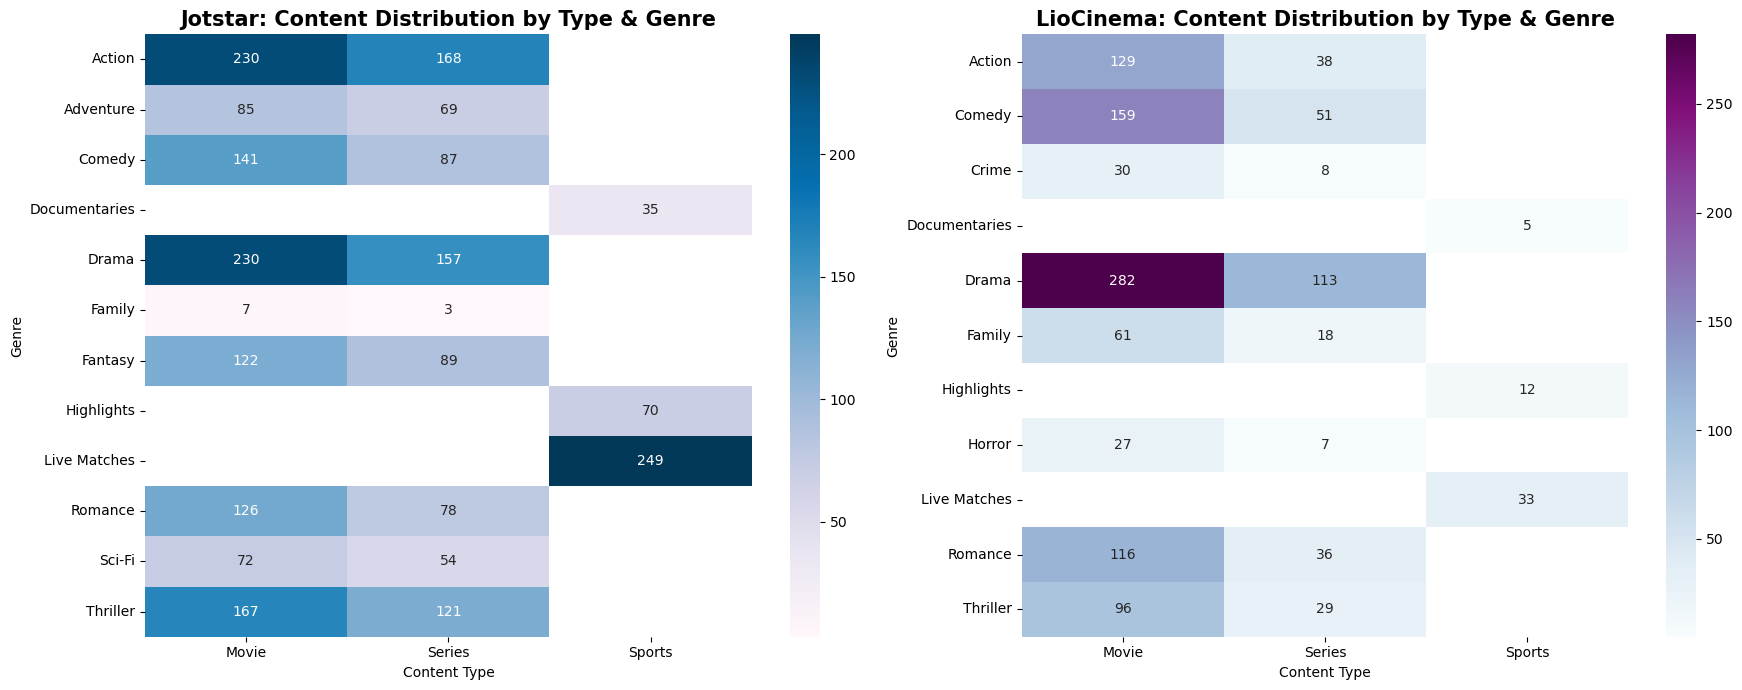

In [11]:
def get_content_count(df):
    result = df.groupby(['Content Type', 'Genre'])['Content ID'].count()
    result = result.to_frame().rename(columns = {'Content ID':'Total Content'}).reset_index()
    return result
    
jotstar_temp_df = get_content_count(jotstar_contents_df)
liocinema_temp_df = get_content_count(liocinema_contents_df)

plt.figure(figsize = (18, 7))

plt.subplot(1, 2, 1)
plt.title("Jotstar: Content Distribution by Type & Genre", fontsize = 15, fontweight = "bold")
jotstar = jotstar_temp_df.pivot_table(columns = 'Content Type', index = 'Genre', values = 'Total Content')
sns.heatmap(jotstar, cmap = "PuBu", annot = True, fmt = ".0f")

plt.subplot(1, 2, 2)
plt.title("LioCinema: Content Distribution by Type & Genre", fontsize = 15, fontweight = "bold")
liocinema = liocinema_temp_df.pivot_table(columns = 'Content Type', index = 'Genre', values = 'Total Content')
sns.heatmap(liocinema, cmap = "BuPu", annot = True, fmt = ".0f")
    
plt.tight_layout()

## Next Notebook: "6. Subscription Trends: Acquisition & Demographics"